In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('data/zomato_dataset.csv')

In [4]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


# Data Cleaning Part and EDA

In [5]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [8]:
df.shape

(45584, 20)

In [9]:
df.drop(labels = ['ID' , 'Delivery_person_ID'] , axis = 1 , inplace = True)

In [10]:
df.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23


In [16]:
df.isna().sum()

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [11]:
#  find this unique value in each column

for col in df.columns:
    print(df[col].unique())
    print('***********************************************************************')
    print('***********************************************************************')

[36. 21. 23. 34. 24. 29. 35. 33. 25. 31. 37. 27. 32. 26. 38. 20. 22. nan
 28. 39. 30. 15. 50.]
***********************************************************************
***********************************************************************
[4.2 4.7 4.3 4.5 4.  4.9 4.1 5.  4.8 3.5 4.6 nan 4.4 3.8 3.9 3.7 2.6 2.5
 3.6 3.1 2.7 1.  3.2 3.3 6.  3.4 2.8 2.9 3. ]
***********************************************************************
***********************************************************************
[ 30.327968  10.003064  18.56245   30.899584  26.463504  19.176269
  12.311072  18.592718  17.426228  22.552672  18.563934  23.357804
  11.003669  12.986047  19.221315  13.005801  26.849596  21.160522
  12.934179  18.51421   11.022477  21.160437  15.51315   15.561295
   0.        18.55144   18.593481  21.173343  17.451976  12.972532
  13.064181  19.121999  21.149569  19.091458  22.539129  12.970324
  21.175975  23.369746  12.914264  11.003681  10.96185   27.165108
  26.88842   26.913987  12.30

In [12]:
#replace the nan value with mean

df['Delivery_person_Age'].mean()
df['Delivery_person_Age'] = df['Delivery_person_Age'].fillna(value =29)

In [13]:
# replace the nan value with mean
df['Delivery_person_Ratings'].mean()
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(value = 4.6)

In [14]:
df['Delivery_location_longitude'].isna().sum()

0

In [42]:
# replace nan value with mode 
df['Weather_conditions'].mode()


0    Fog
Name: Weather_conditions, dtype: object

In [43]:
df["Weather_conditions"] = df['Weather_conditions'].fillna(value = 'Fog')

In [40]:
# replace nan value with mode
df['Road_traffic_density'].mode()


0    Low
Name: Road_traffic_density, dtype: object

In [41]:
df['Road_traffic_density'] = df['Road_traffic_density'].fillna(value = 'Low')

In [36]:
# replace nan value with mode
df["City"].mode()


0    Metropolitian
Name: City, dtype: object

In [37]:
df["City"] = df["City"].fillna(value= 'Metropolitian')

In [46]:
df['multiple_deliveries'].mode()

0    1.0
Name: multiple_deliveries, dtype: float64

In [47]:
df["multiple_deliveries"] = df['multiple_deliveries'].fillna(value=1)

In [20]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [29]:
df.drop(labels = ['Restaurant_latitude' , 'Restaurant_longitude' , 'Delivery_location_latitude' , 'Delivery_location_longitude'  , 'Order_Date', 'Time_Orderd' ,'Time_Order_picked' ,'Vehicle_condition' , 'Delivery_person_Ratings'] , axis =1 , inplace=True)

In [26]:
# replace nan value with mode
festival_mode = df['Festival'].mode
df['Festival'] = df['Festival'].fillna(value=festival_mode)

In [48]:
df.isna().sum()

Delivery_person_Age     0
Weather_conditions      0
Road_traffic_density    0
Type_of_order           0
Type_of_vehicle         0
multiple_deliveries     0
Festival                0
City                    0
Time_taken (min)        0
dtype: int64

In [51]:
df.head()

,Delivery_person_Age,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,Fog,Jam,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,Stormy,High,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,Sandstorms,Medium,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,Sandstorms,Low,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,Fog,Jam,Snack,scooter,1.0,No,Metropolitian,41


# Divide Data Numerical columns and Categorical Columns

In [52]:
Numerical_cols = []
Categorical_cols = []

for col in df.columns:
    if df[col].dtypes == "O":
        Categorical_cols.append(col)
        
    if df[col].dtypes != "O":
        Numerical_cols.append(col)
        
    else:
        pass

In [53]:
Numerical_cols

['Delivery_person_Age', 'multiple_deliveries', 'Time_taken (min)']

In [54]:
Categorical_cols

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

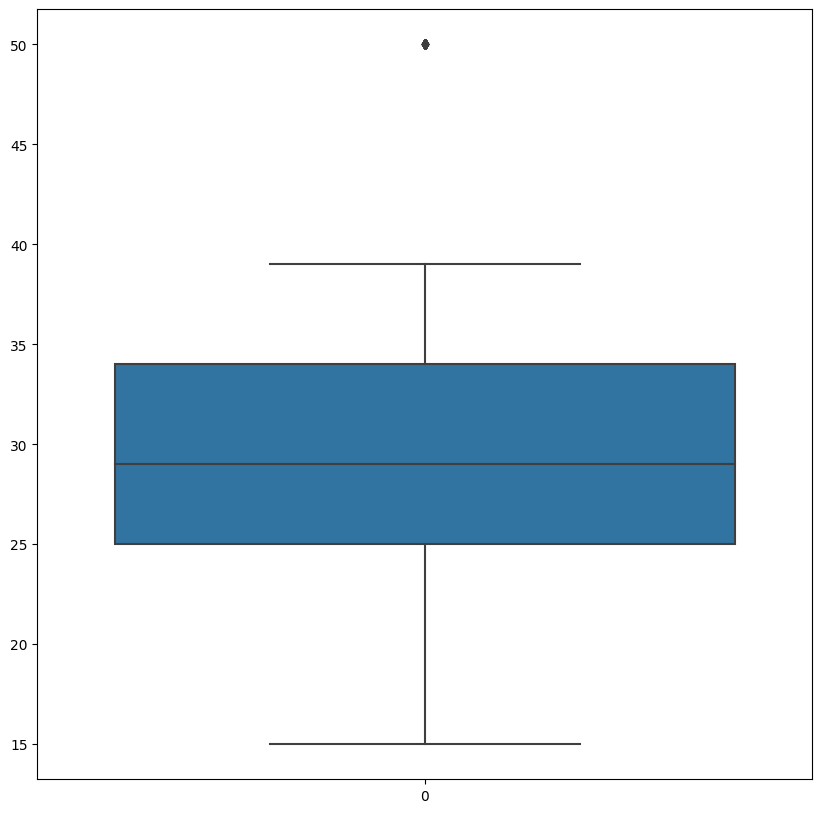

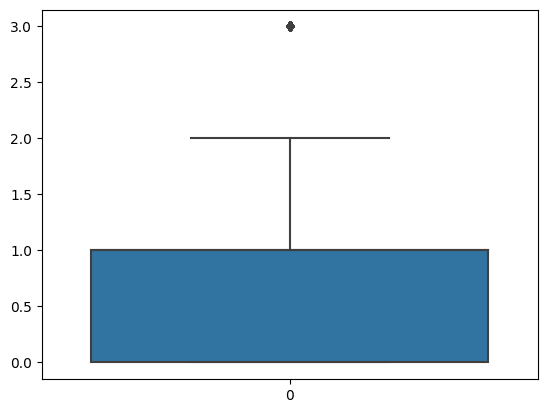

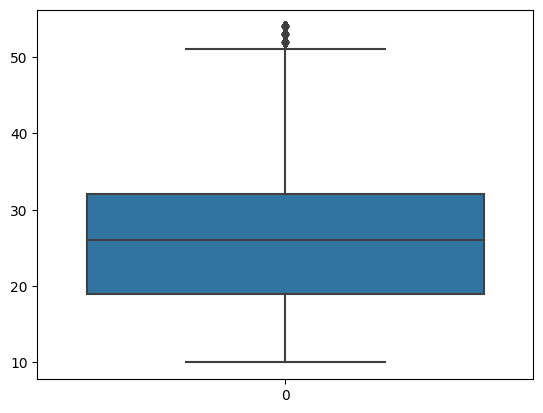

In [55]:
# Find Outliers in numerical columns.
plt.figure(figsize = (10,10))
for col in Numerical_cols:
    sns.boxplot(df[col])
    plt.show()

# obeservation

# No Outliers in dataset

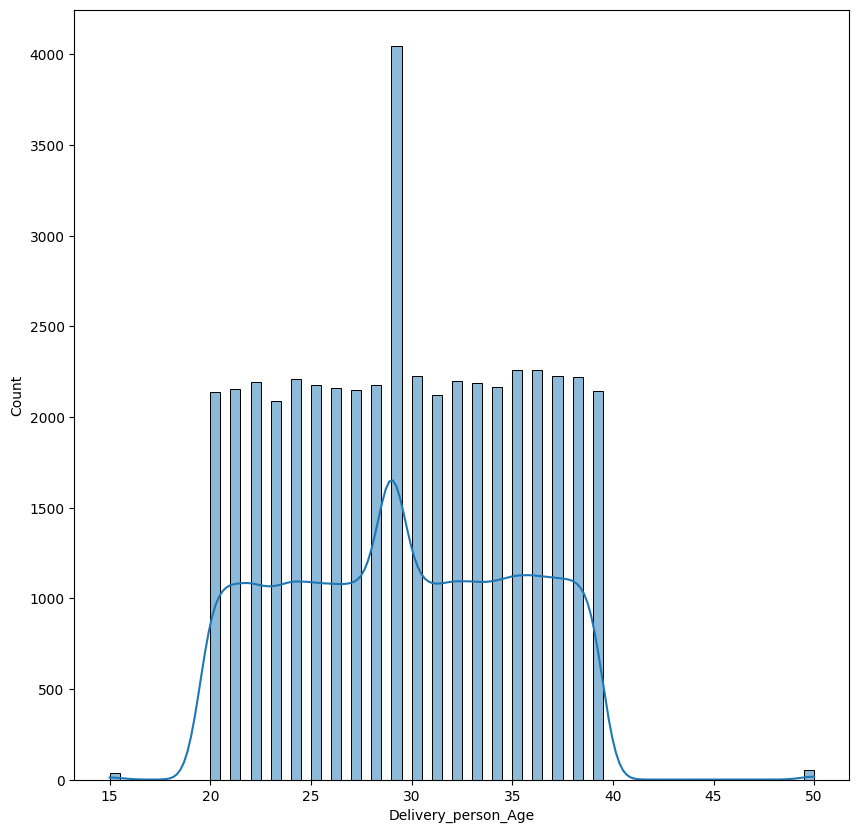

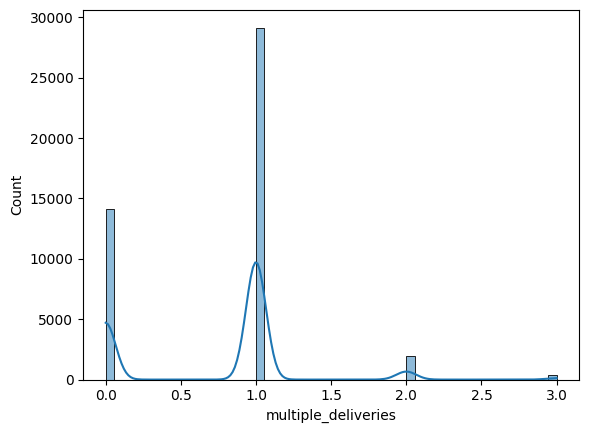

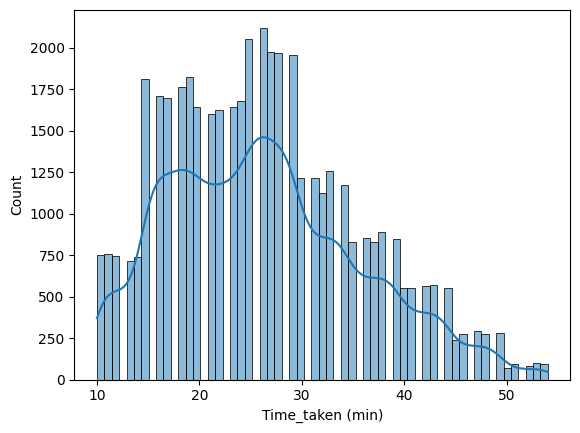

In [57]:
plt.figure(figsize = (10,10))
for i in Numerical_cols:
    sns.histplot(data = df , x = i , kde = True)
    print('\n')
    plt.show()

In [58]:
df.head()

,Delivery_person_Age,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,Fog,Jam,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,Stormy,High,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,Sandstorms,Medium,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,Sandstorms,Low,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,Fog,Jam,Snack,scooter,1.0,No,Metropolitian,41


<Axes: title={'center': 'Weather condition'}, ylabel='count'>

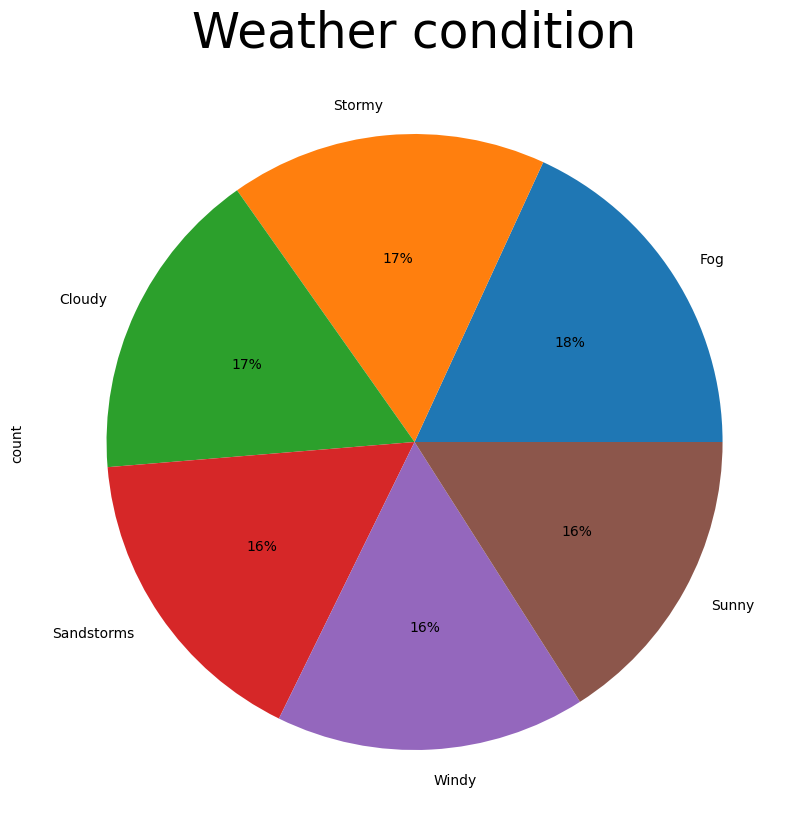

In [59]:
## Weather_conditions feature value count
plt.figure(figsize = (10,10))
plt.title('Weather condition' , fontsize = 35)
df['Weather_conditions'].value_counts().plot.pie(autopct='%1.0f%%')

<Axes: title={'center': 'Road traffic density'}, ylabel='count'>

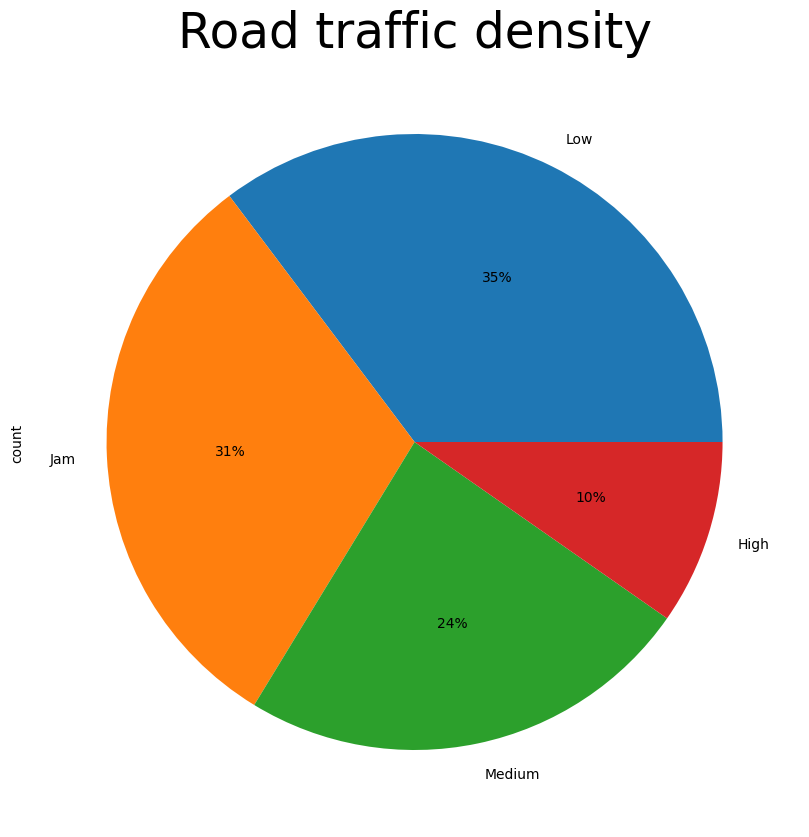

In [62]:
## Road_traffic_density	 feature value count
plt.figure(figsize = (10,10))
plt.title('Road traffic density' , fontsize = 35)
df['Road_traffic_density'].value_counts().plot.pie(autopct='%1.0f%%')

# obeservation
# Road traffic density is LOW

<Axes: title={'center': 'Type Of Order'}, ylabel='count'>

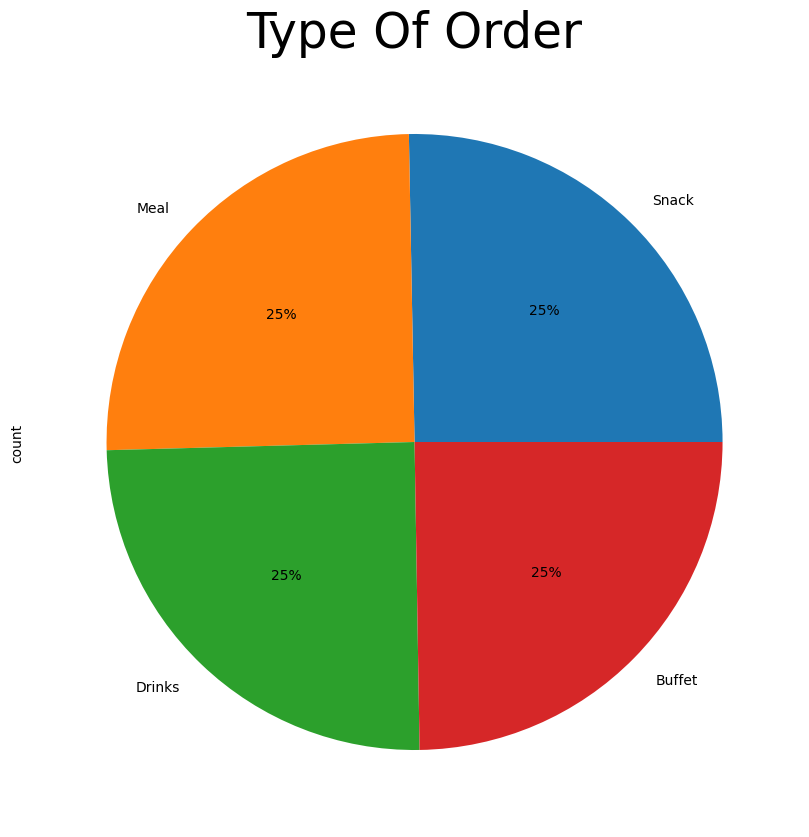

In [63]:
## Type_of_order feature value count
plt.figure(figsize = (10,10))
plt.title('Type Of Order' , fontsize = 35)
df['Type_of_order'].value_counts().plot.pie(autopct='%1.0f%%')

<Axes: title={'center': 'Type Of Vehicle'}, ylabel='count'>

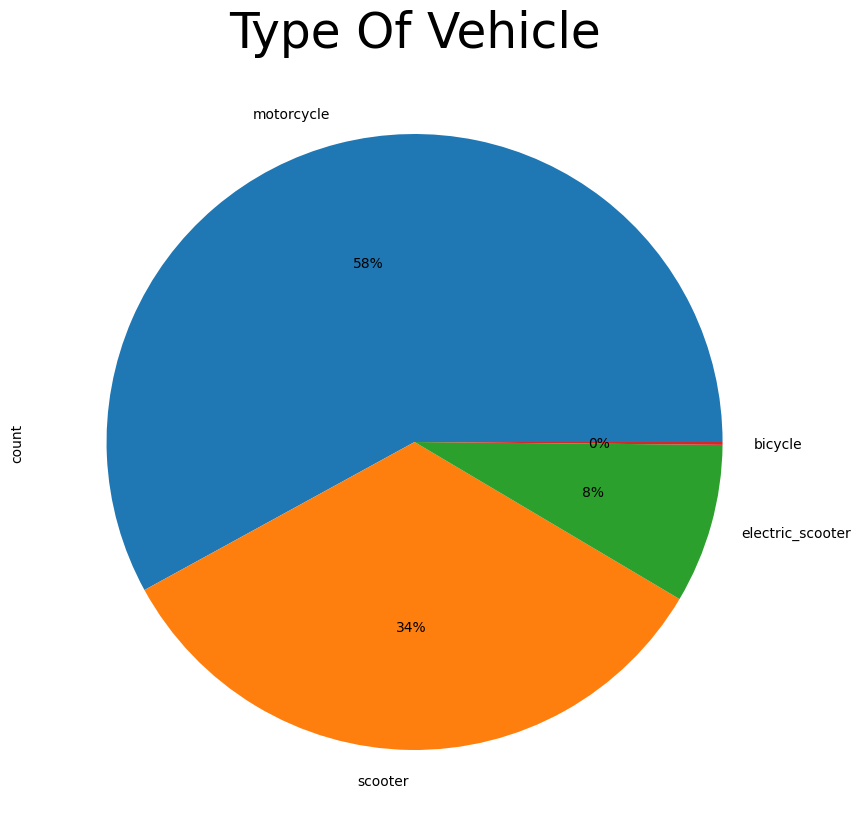

In [64]:
## Type_of_vehicle feature value count
plt.figure(figsize = (10,10))
plt.title('Type Of Vehicle' , fontsize = 35)
df['Type_of_vehicle'].value_counts().plot.pie(autopct='%1.0f%%')

# obeservation
# delivery person  use a motorcycle

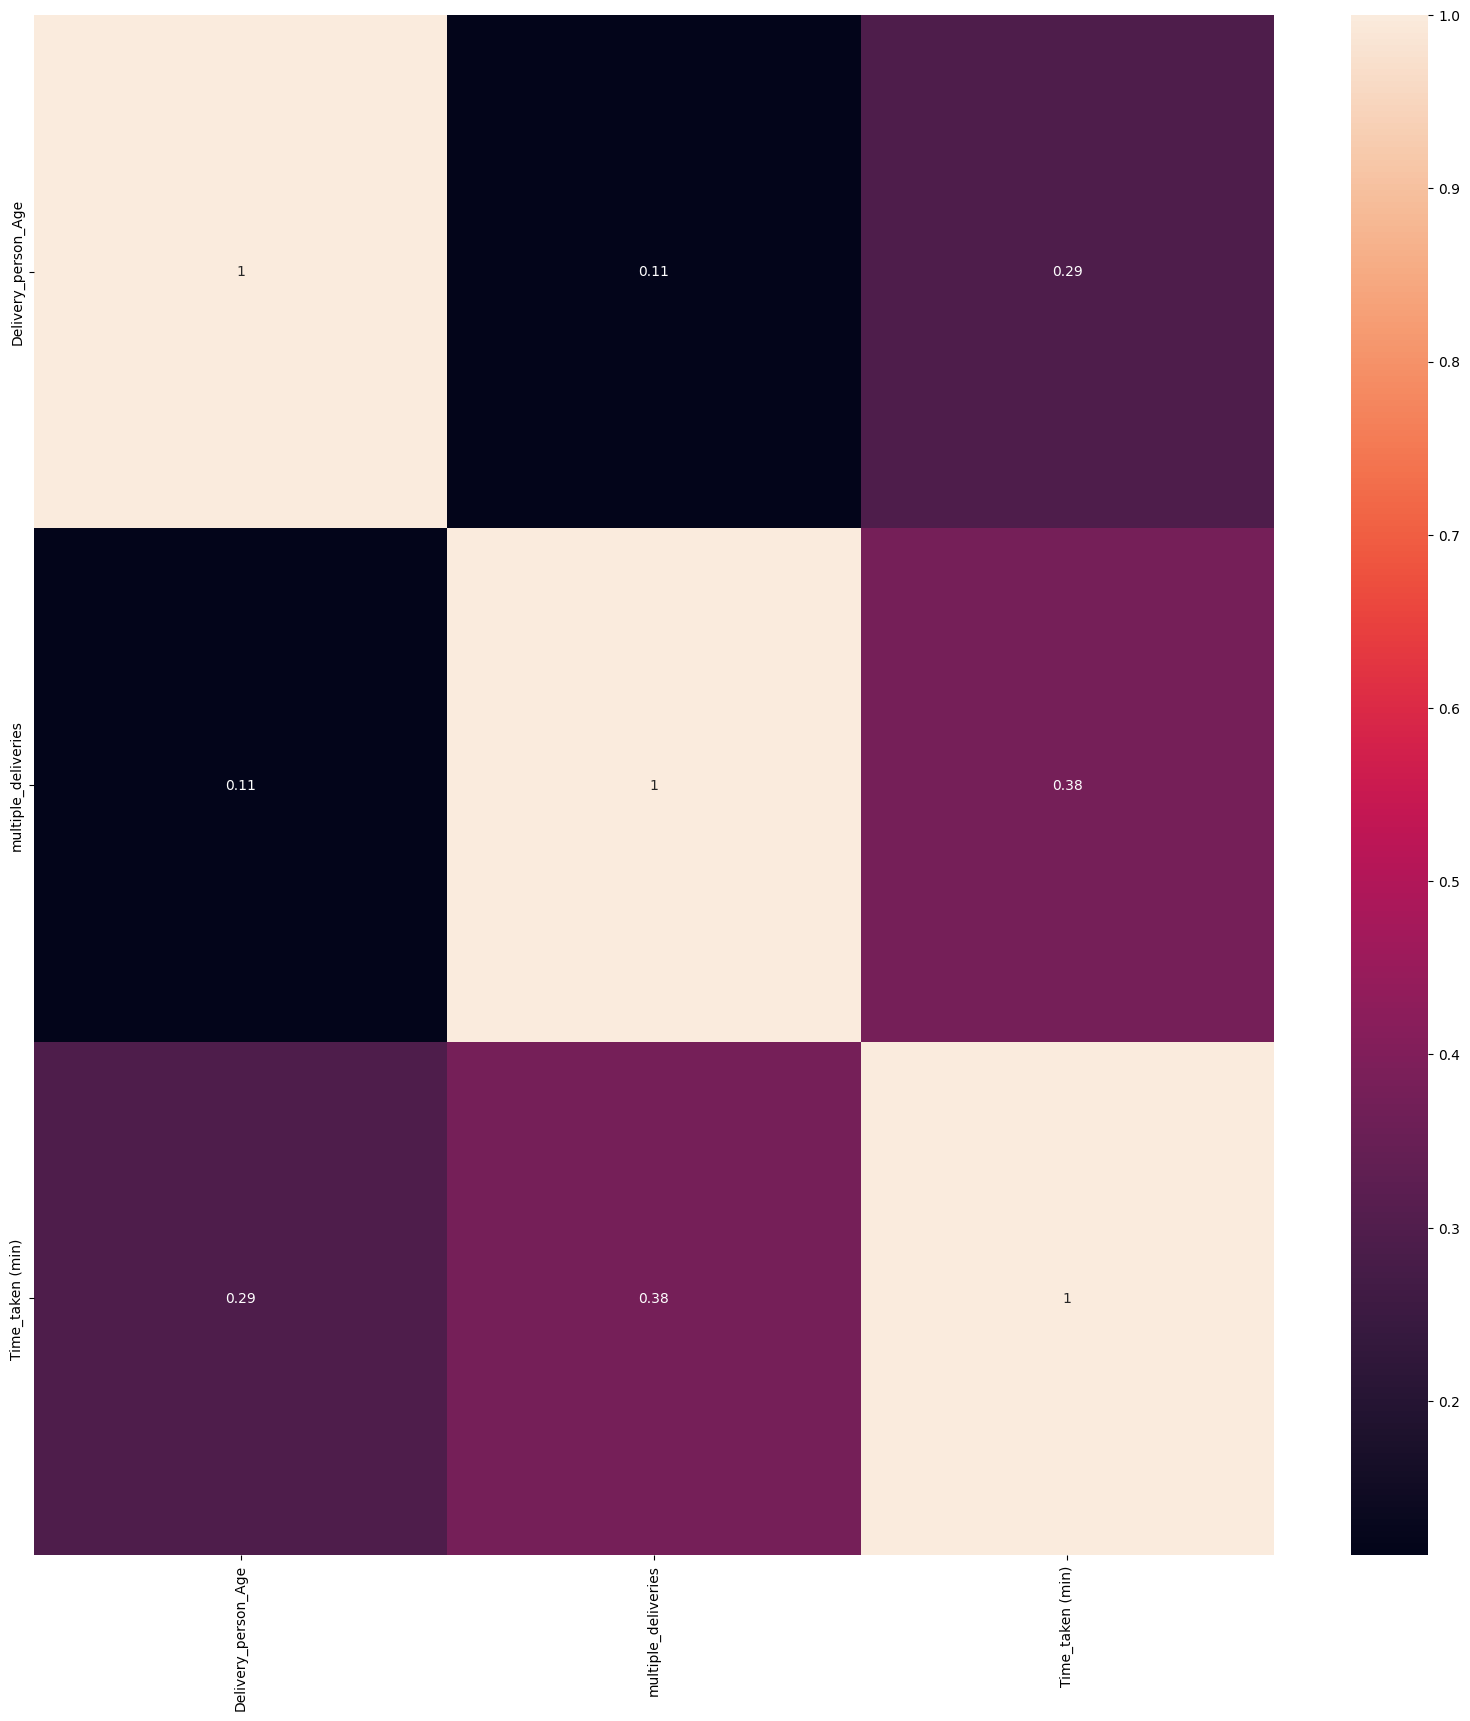

In [66]:
plt.figure(figsize = (20,20))
sns.heatmap(df[Numerical_cols].corr() , annot = True)
plt.xticks(rotation = 90)
plt.show()